In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from neuron import h
from neuron.units import mV, ms

In [2]:
h.load_file("stdrun.hoc")

1.0

In [3]:
def xrun(ifxs):
    mvecs = []
    
    h.finitialize()

    for i in range(len(ifxs)):
        mvec = h.Vector(0)
        mvecs.append(mvec)

    while h.t < h.tstop:
        for i, ifx in enumerate(ifxs):
            mvecs[i].append(ifx.M())
        h.fadvance()
    for i, ifx in enumerate(ifxs):
        mvecs[i].append(ifx.M())

    # for ifx in ifxs:
    # mvec = h.Vector(0)
    # h.finitialize()

    # while h.t < h.tstop:
    #     mvec.append(ifx.M())
    #     h.fadvance()
    # mvec.append(ifx.M())
    # mvecs.append(mvec)

    return mvecs

In [4]:
# ac = h.IntFire4()
# ac.taue = 3
# ac.taui1 = 0.001
# ac.taui2 = 10
# ac.taum = 10

# ic = h.IntFire4()
# ic.taue = 3
# ic.taui1 = 0.001
# ic.taui2 = 10
# ic.taum = 10

# fusi1 = h.IntFire4()
# fusi1.taue = 3
# fusi1.taui1 = 0.001
# fusi1.taui2 = 10
# fusi1.taum = 10

# fusi2 = h.IntFire4()
# fusi2.taue = 3
# fusi1.taui1 = 0.001
# fusi2.taui2 = 10
# fusi2.taum = 10

# inter = h.IntFire4()
# inter.taue = 3
# inter.taui1 = 0.001
# inter.taui2 = 10
# inter.taum = 10


In [5]:
ac = h.IntFire1()
ac.tau = 10
ac.refrac = 3

ic = h.IntFire1()
ic.tau = 10
ic.refrac = 3

fusi1 = h.IntFire1()
fusi1.tau = 10
fusi1.refrac = 3

fusi2 = h.IntFire1()
fusi2.tau = 10
fusi2.refrac = 3

inter = h.IntFire1()
inter.tau = 10
inter.refrac = 3


In [6]:
h.cvode_active(0)
h.tstop = 1000 * ms  # ms
h.celsius = 34
h.steps_per_ms = 100
h.dt = 1.0 / h.steps_per_ms
h.v_init = -60 * mV

In [21]:
ns = h.NetStim()
ns.interval = 10
ns.number = 1e6
ns.start = 0
ns.noise = 0

nc_A = h.NetCon(ns,ac,1,0,1)
# nc_F = h.NetCon(ns,fusi1,1,0,1)

# in_IC = h.IClamp(ac.get_segment())
# in_IC.delay = 0 * ms
# in_IC.dur = h.tstop
# in_IC.amp = 0.2 

nc_AF1 = h.NetCon(ac,fusi1,1,0,1)
nc_AF2 = h.NetCon(ac,fusi2,1,0,1)
nc_IntF1 = h.NetCon(inter,fusi1,1,0,-1)
nc_IntF2 = h.NetCon(inter,fusi2,1,0,-1)
nc_IcInt = h.NetCon(ic,inter,1,0,1)
nc_FIc1 = h.NetCon(fusi1,ic,1,0,1)
nc_IcF1 = h.NetCon(ic,fusi1,1,0,1)
nc_FIc2 = h.NetCon(fusi2,ic,1,0,1)
nc_IcF2 = h.NetCon(ic,fusi2,1,0,1)

In [22]:
net_ms = xrun([ac, inter, ic, fusi1, fusi2])
# net_ms = xrun([fusi1])

(0.0, 3000.0)

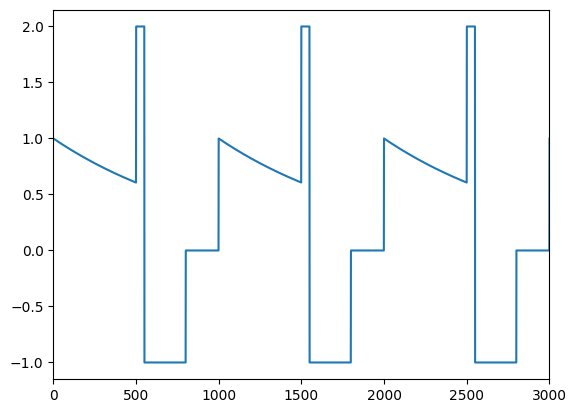

In [90]:
ac_ms = np.array(net_ms[0])
plt.plot(ac_ms)
plt.xlim([0,3000])
# max(ac_ms)

In [95]:
ic_ms = np.array(net_ms[2])
np.where(ic_ms[1000:1600] == 2.0)[0].shape

(50,)

AC: 50 spikes
Int: 12 spikes
IC: 25 spikes
Fusi1: 25 spikes
Fusi2: 25 spikes


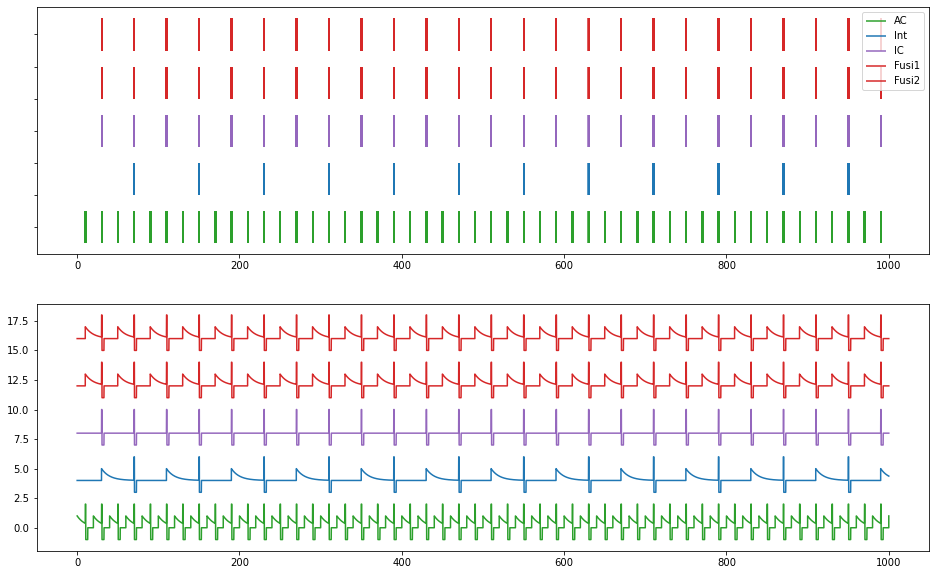

In [32]:
%matplotlib inline

cells = ['AC', 'Int', 'IC', 'Fusi1', 'Fusi2']
colors = ['tab:green', 'tab:blue', 'tab:purple', 'tab:red', 'tab:red']

fig,axs = plt.subplots(2,1,figsize=(16,10))
axs.ravel()

for i, if_m in enumerate(net_ms):
    m_arr = np.array(if_m)

    spike_times = np.where(m_arr == 2.0)[0]   #get_spike_times(m_arr, h.tstop, 1, h.steps_per_ms)  # np.where((m_arr > 0.999) & (m_arr < 0.9999))
    # plt.plot(list(m))
    axs[0].vlines([spike_time*h.dt for spike_time in spike_times], -1+i*3,1+i*3, color=colors[i], label=cells[i])
    axs[0].set_xlim([-50,h.tstop+50])
    # axs.set_ylim((-3,3))
    axs[0].set_yticklabels([])
    axs[0].legend(loc='upper right')

    axs[1].plot(m_arr+i*4, color=colors[i], label=cells[i])
    # axs[1].set_xlim([-5000,25000])
    axs[1].set_xticks([0,20000,40000,60000,80000,100000])
    axs[1].set_xticklabels([0,200,400,600,800,1000])

    print(f'{cells[i]}: {spike_times.shape[0]//50} spikes')

In [11]:


conn_df = pd.read_excel('Connectivity.xlsx')

if1 = h.IntFire1()
if1.tau = 10  # ms - time constant
if1.refrac = 3  # ms - refractory period (AHP time constant)

if2 = h.IntFire1()
if2.tau = 10  # ms - time constant
if2.refrac = 3  # ms - refractory period (AHP time constant)

if4 = h.IntFire4()
if4.taue = 3
if4.taui2 = 10

h.cvode_active(0)
h.tstop = 1000 * ms  # ms
h.celsius = 34
h.steps_per_ms = 100
h.dt = 1.0 / h.steps_per_ms
h.v_init = -60 * mV

ns = h.NetStim()
ns.interval = 50
ns.number = 1e6
ns.start = 0
ns.noise = 0

nc1 = h.NetCon(ns, if1, 1, 0, 1)
nc2 = h.NetCon(if1, if4, 1, 0, -1)
nc4 = h.NetCon(ns,if4,1,0,1)
# nc3 = h.NetCon(ns, if2, 1, 50, -1)

if_ms = xrun([if1, if4])
# m_arr = np.array(ms)

In [12]:
if_ms

[Vector[5], Vector[6]]

11 spikes
43 spikes


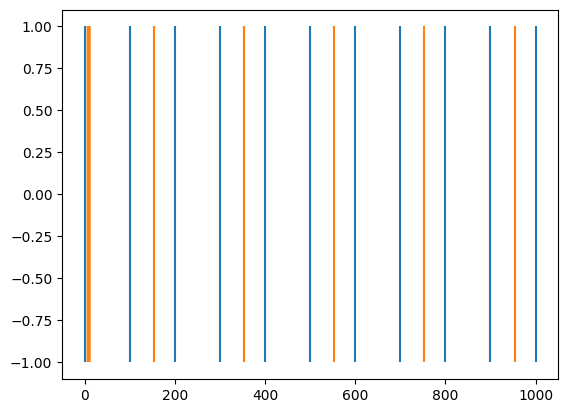

In [13]:
%matplotlib inline

colors = ['tab:blue', 'tab:orange']

for i, if_m in enumerate(if_ms):
    m_arr = np.array(if_m)

    spike_times = np.where((m_arr > 0.999) & (m_arr < 0.9999))
    # plt.plot(list(m))
    plt.vlines([spike_time*h.dt for spike_time in spike_times], -1,1, color=colors[i])
    plt.xlim([-50,h.tstop+50])

    print(f'{np.shape(spike_times)[1]} spikes')

In [14]:
def get_spike_times(cell_ms, tstop, interval_ms, steps_per_ms):
    intervals = []
    for i in range(int(tstop / interval_ms)):
        step = int(interval_ms*steps_per_ms)
        lb = int(step*i + interval_ms) if i > 0 else 0
        ub = int(step*(i+1) + interval_ms)

        intervals.append((lb,ub))

    spike_times = []
    for interval in intervals:
        sub_cell_ms = cell_ms[interval[0]:interval[1]]
        pos_spikes = sub_cell_ms[np.where(sub_cell_ms == 2.0)]
        if pos_spikes.size > 0:
            max_loc = sub_cell_ms.argmax()
            spike_time = max_loc + interval[0]
            spike_times.append(spike_time)
    
    return spike_times

ac_spikes = get_spike_times(np.array(net_ms[0]), h.tstop, 1, h.steps_per_ms)
len(ac_spikes)

NameError: name 'm' is not defined